In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from pandas import read_csv

The Actual Data

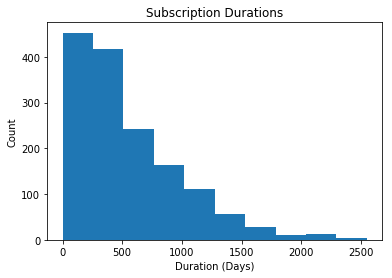

In [2]:
dates = np.array(read_csv("Newspaper_subscription.csv",parse_dates=[0,1]))
durations = [int((dates[i][1]-dates[i][0])/10**9/86400) for i in range(len(dates))]
plt.hist(durations)
plt.title('Subscription Durations')
plt.ylabel('Count')
plt.xlabel('Duration (Days)')
plt.show()

The Data's CDF (Cumulative Density Function)

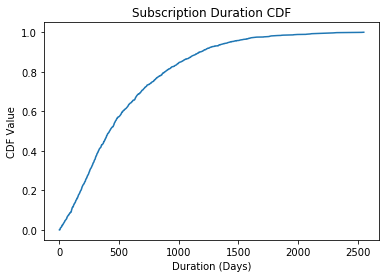

In [3]:
durations = np.sort(durations)
cdfval = []
for i in range(len(durations)):
    cdfval.append(i*1./len(durations))
plt.plot(durations, cdfval)
plt.title('Subscription Duration CDF')
plt.ylabel('CDF Value')
plt.xlabel('Duration (Days)')
plt.show()

Fitting the Data

(549.2786666666667, 446.9005299596569)


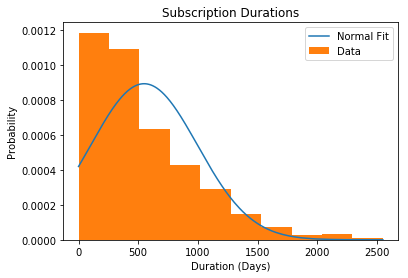

In [4]:
normfit = stats.norm.fit(durations)
print normfit
ppfvals = []
for d in durations:
    thisppfval = stats.norm.pdf(d, normfit[0], normfit[1])
    ppfvals.append(thisppfval)
plt.plot(durations, ppfvals, label='Normal Fit')
plt.hist(durations, normed=True, label='Data')
plt.title('Subscription Durations')
plt.ylabel('Probability')
plt.xlabel('Duration (Days)')
plt.legend()
plt.show()

(0.0, 549.2786666666667)


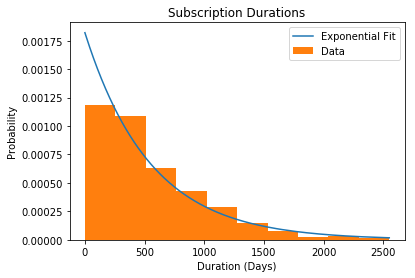

In [5]:
exponfit = stats.expon.fit(durations)
print exponfit
ppfvals = []
for d in durations:
    thisppfval = stats.expon.pdf(d, exponfit[0], exponfit[1])
    ppfvals.append(thisppfval)
plt.plot(durations, ppfvals, label='Exponential Fit')
plt.hist(durations, normed=True, label='Data')
plt.title('Subscription Durations')
plt.ylabel('Probability')
plt.xlabel('Duration (Days)')
plt.legend()
plt.show()

(1.393817460538636, -1.3125166196861389, 395.0238790291623)


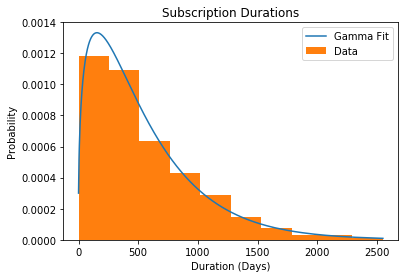

In [6]:
gammafit = stats.gamma.fit(durations)
print gammafit
ppfvals = []
for d in durations:
    thisppfval = stats.gamma.pdf(d, gammafit[0], gammafit[1], gammafit[2])
    ppfvals.append(thisppfval)
plt.plot(durations, ppfvals, label='Gamma Fit')
plt.hist(durations, normed=True, label='Data')
plt.title('Subscription Durations')
plt.ylabel('Probability')
plt.xlabel('Duration (Days)')
plt.legend()
plt.show()

(-163.73726748847, 595.0259405684808)


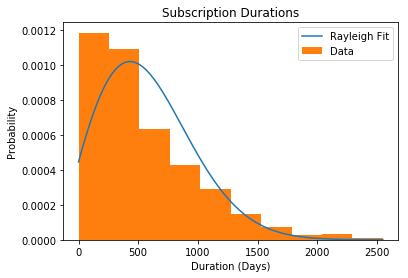

In [7]:
rayleighfit = stats.rayleigh.fit(durations)
print rayleighfit
ppfvals = []
for d in durations:
    thisppfval = stats.rayleigh.pdf(d, rayleighfit[0], rayleighfit[1])
    ppfvals.append(thisppfval)
plt.plot(durations, ppfvals, label='Rayleigh Fit')
plt.hist(durations, normed=True, label='Data')
plt.title('Subscription Durations')
plt.ylabel('Probability')
plt.xlabel('Duration (Days)')
plt.legend()
plt.show()

C:\Users\esolo\Anaconda2\lib\site-packages\scipy\stats\_continuous_distns.py:437: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\esolo\Anaconda2\lib\site-packages\scipy\stats\_continuous_distns.py:438: RuntimeWarning: invalid value encountered in double_scalars
  ku = a**3 - a**2*(2*b-1) + b**2*(b+1) - 2*a*b*(b+2)


(1.2565410913148933, 10.543275401897006, -0.3452778162257978, 5162.667773942325)


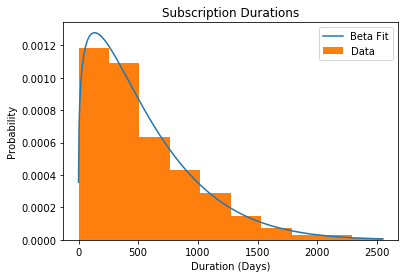

In [8]:
betafit = stats.beta.fit(durations)
print betafit
ppfvals = []
for d in durations:
    thisppfval = stats.beta.pdf(d, betafit[0], betafit[1], betafit[2], betafit[3])
    ppfvals.append(thisppfval)
plt.plot(durations, ppfvals, label='Beta Fit')
plt.hist(durations, normed=True, label='Data')
plt.title('Subscription Durations')
plt.ylabel('Probability')
plt.xlabel('Duration (Days)')
plt.legend()
plt.show()

Q-Q Plots and K-S Test Statistics

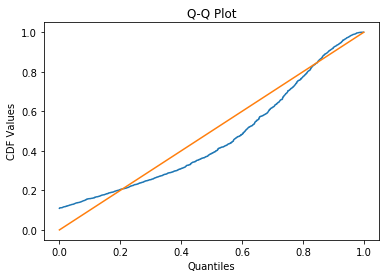

KstestResult(statistic=0.12449936476125062, pvalue=0.0)


In [9]:
quantiles = np.array([i for i in range(len(durations))])*1./np.size(durations)
thiscdf = stats.norm.cdf(durations, normfit[0], normfit[1])
plt.plot(quantiles, thiscdf)
plt.plot([0,1],[0,1])
plt.title('Q-Q Plot')
plt.ylabel('CDF Values')
plt.xlabel('Quantiles')
plt.show()
print stats.kstest(durations, 'norm', normfit)

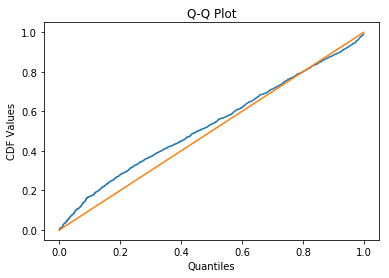

KstestResult(statistic=0.0809214172910688, pvalue=5.429048766103506e-09)


In [10]:
thiscdf = stats.expon.cdf(durations, exponfit[0], exponfit[1])
plt.plot(quantiles, thiscdf)
plt.plot([0,1],[0,1])
plt.title('Q-Q Plot')
plt.ylabel('CDF Values')
plt.xlabel('Quantiles')
plt.show()
print stats.kstest(durations, 'expon', exponfit)

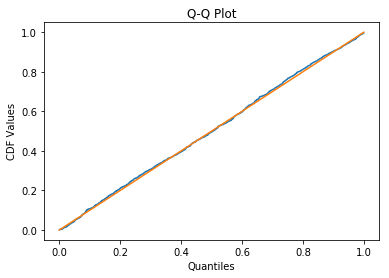

KstestResult(statistic=0.017011435621632987, pvalue=0.7781788700956284)


In [11]:
thiscdf = stats.gamma.cdf(durations, gammafit[0], gammafit[1], gammafit[2])
plt.plot(quantiles, thiscdf)
plt.plot([0,1],[0,1])
plt.title('Q-Q Plot')
plt.ylabel('CDF Values')
plt.xlabel('Quantiles')
plt.show()
print stats.kstest(durations, 'gamma', gammafit)

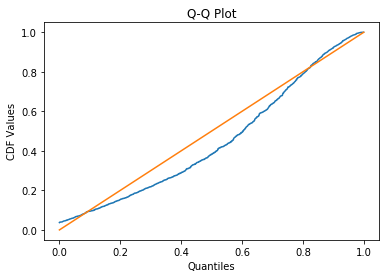

KstestResult(statistic=0.12166056874123271, pvalue=0.0)


In [12]:
thiscdf = stats.rayleigh.cdf(durations, rayleighfit[0], rayleighfit[1])
plt.plot(quantiles, thiscdf)
plt.plot([0,1],[0,1])
plt.title('Q-Q Plot')
plt.ylabel('CDF Values')
plt.xlabel('Quantiles')
plt.show()
print stats.kstest(durations, 'rayleigh', rayleighfit)

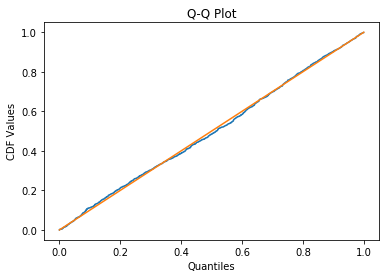

KstestResult(statistic=0.022607284405144923, pvalue=0.4273206217121827)


In [13]:
thiscdf = stats.beta.cdf(durations, betafit[0], betafit[1], betafit[2], betafit[3])
plt.plot(quantiles, thiscdf)
plt.plot([0,1],[0,1])
plt.title('Q-Q Plot')
plt.ylabel('CDF Values')
plt.xlabel('Quantiles')
plt.show()
print stats.kstest(durations, 'beta', betafit)

Gamma and Beta Best Fits

In [14]:
print "Gamma: ", gammafit
print "Beta: ", betafit

Gamma:  (1.393817460538636, -1.3125166196861389, 395.0238790291623)
Beta:  (1.2565410913148933, 10.543275401897006, -0.3452778162257978, 5162.667773942325)


Find Ranges for Distribution Parameters

In [15]:
n = 100
gamma0 = np.ones(n)
gamma1 = np.ones(n)
gamma2 = np.ones(n)
for i in range(n):
    gammagen = np.random.choice(durations, int(np.size(durations)*.9))
    bootstrapgammafit = stats.gamma.fit(gammagen)
    gamma0[i] = bootstrapgammafit[0]
    gamma1[i] = bootstrapgammafit[1]
    gamma2[i] = bootstrapgammafit[2]
gamma0mean = np.mean(gamma0)
gamma0stdev = np.std(gamma0)
print "Average for first parameter: ", gamma0mean, " with 95% half-width ", gamma0stdev*1.96
gamma1mean = np.mean(gamma1)
gamma1stdev = np.std(gamma1)
print "Average for second parameter: ", gamma1mean, " with 95% half-width ", gamma1stdev*1.96
gamma2mean = np.mean(gamma2)
gamma2stdev = np.std(gamma2)
print "Average for third parameter: ", gamma2mean, " with 95% half-width ", gamma2stdev*1.96

Average for first parameter:  1.395101954213932  with 95% half-width  0.13014577015943088
Average for second parameter:  -0.8577316637314617  with 95% half-width  3.5733784561459707
Average for third parameter:  396.4531279684902  with 95% half-width  40.339463082959


In [16]:
n = 100
beta0 = np.ones(n)
beta1 = np.ones(n)
beta2 = np.ones(n)
beta3 = np.ones(n)
for i in range(n):
    betagen = np.random.choice(durations, int(np.size(durations)*.9))
    bootstrapbetafit = stats.beta.fit(betagen)
    beta0[i] = bootstrapbetafit[0]
    beta1[i] = bootstrapbetafit[1]
    beta2[i] = bootstrapbetafit[2]
    beta3[i] = bootstrapbetafit[3]
beta0mean = np.mean(beta0)
beta0stdev = np.std(beta0)
print "Average for first parameter: ", beta0mean, " with 95% half-width ", beta0stdev*1.96
beta1mean = np.mean(beta1)
beta1stdev = np.std(beta1)
print "Average for second parameter: ", beta1mean, " with 95% half-width ", beta1stdev*1.96
beta2mean = np.mean(beta2)
beta2stdev = np.std(beta2)
print "Average for third parameter: ", beta2mean, " with 95% half-width ", beta2stdev*1.96
beta3mean = np.mean(beta3)
beta3stdev = np.std(beta3)
print "Average for fourth parameter: ", beta3mean, " with 95% half-width ", beta3stdev*1.96

C:\Users\esolo\Anaconda2\lib\site-packages\scipy\optimize\minpack.py:163: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


Average for first parameter:  1.2325850042876223  with 95% half-width  0.14698188548033725
Average for second parameter:  11.086876218669959  with 95% half-width  13.01280632842057
Average for third parameter:  1.0981188432889633  with 95% half-width  3.8076943026730308
Average for fourth parameter:  5413.425366432305  with 95% half-width  5099.185683368652


Simulate Data

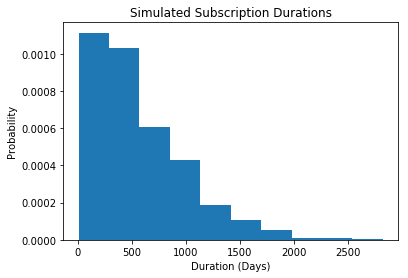

In [28]:
generatedbeta = stats.beta.rvs(beta0mean, beta1mean, beta2mean, beta3mean, size=1000)
plt.hist(generatedbeta, normed=True)
plt.title('Simulated Subscription Durations')
plt.ylabel('Probability')
plt.xlabel('Duration (Days)')
plt.show()

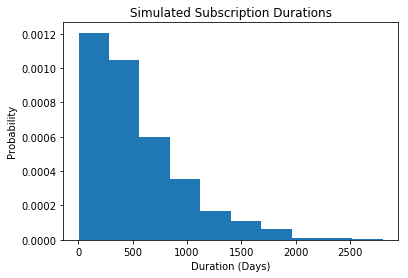

In [27]:
generatedgamma = stats.gamma.rvs(gamma0mean, gamma1mean, gamma2mean, size=1000)
plt.hist(generatedgamma, normed=True)
plt.title('Simulated Subscription Durations')
plt.ylabel('Probability')
plt.xlabel('Duration (Days)')
plt.show()